# Objective: 

To perform Exploratory Data Analysis (EDA) on haberman dataset and identify which features are useful towards classification
of survival of a patient who had undergone a surgery for breast cancer.

In [1]:
#import required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# High Level Statistics: 

In [2]:
#read dataset and highlight high level statistics
haberman_data = pd.read_csv('haberman.csv')
print('No. of data points: ',haberman_data.shape[0])
print('No. of features: ',haberman_data.shape[1]-1)
print('Columns in haberman dataset: ',haberman_data.columns)
print('Distinct classes: ',haberman_data['status'].unique())
print('No. of datapoints under each class: ')
print(haberman_data['status'].value_counts())

No. of data points:  306
No. of features:  3
Columns in haberman dataset:  Index(['age', 'year', 'nodes', 'status'], dtype='object')
Distinct classes:  [1 2]
No. of datapoints under each class: 
1    225
2     81
Name: status, dtype: int64


The Haberman dataset contains 306 data points.

The dataset contains following three features and one class:
1. Age of patient at time of operation
2. Patient's year of operation
3. Number of positive axillary nodes detected
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

There are 225 data points under positive class (patient survived) and 81 data points under negative class (patient died) which
represents an imbalanced dataset and a real world sample. Labelling the classes with categories {1: Survived, 2: Died}

In [3]:
haberman_data['status'] = haberman_data['status'].map({1:'Survived', 2:'Died'})
print(haberman_data.head())
print(haberman_data['status'].value_counts())

   age  year  nodes    status
0   30    64      1  Survived
1   30    62      3  Survived
2   30    65      0  Survived
3   31    59      2  Survived
4   31    65      4  Survived
Survived    225
Died         81
Name: status, dtype: int64


# Uni-Variate Analysis:

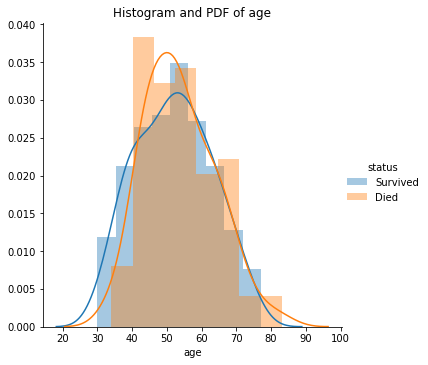

In [4]:
#PDF plot of Age
sns.FacetGrid(haberman_data, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram and PDF of age')
plt.show();

There seems to be a large overlap in terms of age of patients who survived and died after operation. However it is seen that people age 40 to 60 have died within 5 years of operation and people below age of 40 tend to survive.

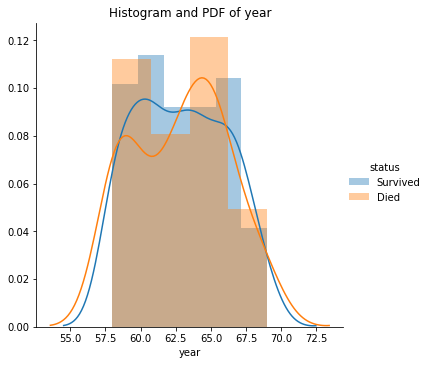

In [5]:
#PDF plot of Year
sns.FacetGrid(haberman_data, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend(); 
plt.title('Histogram and PDF of year')
plt.show();

The histogram tends to overlap in terms of year of operation and more patients have died during the operations performed between 1963 and 1967

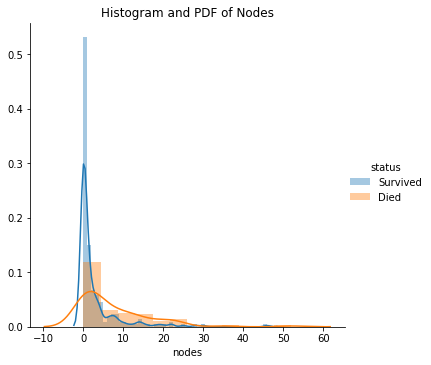

In [6]:
#PDF plot of Nodes
sns.FacetGrid(haberman_data, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram and PDF of Nodes')
plt.show();

Patients with 0 node have a higher survival rate than patients with more than 1 node.

Survived Patients:
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


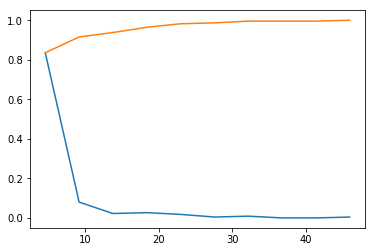

Dead Patients:
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


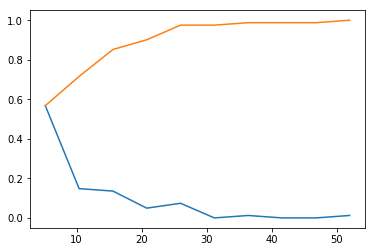

In [14]:
#Separate dataset on the basis of survival status
patients_survived = haberman_data.loc[haberman_data['status'] == 'Survived']
patients_dead = haberman_data.loc[haberman_data['status'] == 'Died']

#CDF plot for nodes of Survived Patients
counts, bin_edges = np.histogram(patients_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print("Survived Patients:")
print(pdf);
print(bin_edges);
print(cdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show()


counts, bin_edges = np.histogram(patients_dead['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print("Dead Patients:")
print(pdf);
print(bin_edges);
print(cdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show()

The Cummulative Density Function plot of nodes shows that more than 83 percent of patients who survived had 0 nodes.

# Statistics:

In [24]:
from statsmodels import robust

print('Statistics of patients survived:')
print('Mean:',np.mean(patients_survived['nodes']))
print('Standard Deviation',np.mean(patients_survived['nodes']))
print('Median:', np.median(patients_survived['nodes']))
print('Quantiles:',np.percentile(patients_survived['nodes'],np.arange(0,101,25)))
print('Median Absolute Deviation:',robust.mad(patients_survived['nodes']))

print('\nStatistics of patients died:')
print('Mean:',np.mean(patients_dead['nodes']))
print('Standard Deviation',np.mean(patients_dead['nodes']))
print('Median:', np.median(patients_dead['nodes']))
print('Quantiles:',np.percentile(patients_dead['nodes'],np.arange(0,101,25)))
print('Median Absolute Deviation:',robust.mad(patients_dead['nodes']))


Statistics of patients survived:
Mean: 2.7911111111111113
Standard Deviation 2.7911111111111113
Median: 0.0
Quantiles: [ 0.  0.  0.  3. 46.]
Median Absolute Deviation: 0.0

Statistics of patients died:
Mean: 7.45679012345679
Standard Deviation 7.45679012345679
Median: 4.0
Quantiles: [ 0.  1.  4. 11. 52.]
Median Absolute Deviation: 5.930408874022408


The difference between mean and median of both dataset shows that there exists outliers in data. 
The patients who survived had a median of 0 nodes and patients who died had a median of 4 nodes.

# Univariate Plots: 

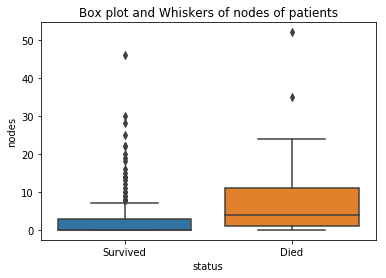

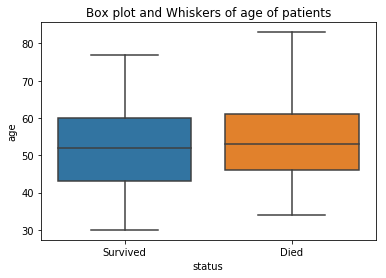

In [30]:
#Box plot and whiskers of nodes of patients

sns.boxplot(x='status',y='nodes', data=haberman_data)
plt.title('Box plot and Whiskers of nodes of patients')
plt.show()

#Box plot and whiskers of age of patients

sns.boxplot(x='status',y='age', data=haberman_data)
plt.title('Box plot and Whiskers of age of patients')
plt.show()

From box plot and whiskers we could infer that patients with 1 or more than one nodes was less likely to survive.
Patients with age 46 or below had survived the operation.

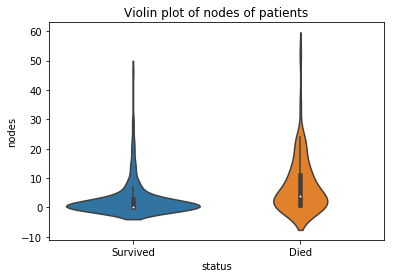

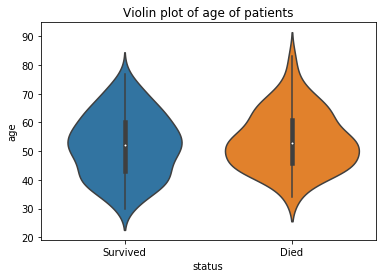

In [33]:
# Violin plot of nodes of patients 

sns.violinplot(x='status', y='nodes', data =haberman_data)
plt.title('Violin plot of nodes of patients')
plt.show()

# Violin plot of age of patients 

sns.violinplot(x='status', y='age', data =haberman_data)
plt.title('Violin plot of age of patients')
plt.show()

Patients who had survived the operation were likely to have 0 nodes.

# Multivariate Analysis:

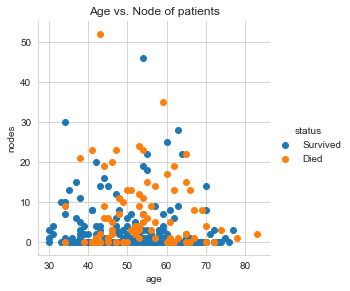

In [38]:
# Scatter plot of Age and Nodes of patients
sns.set_style('whitegrid')
sns.FacetGrid(haberman_data,hue='status',height=4).map(plt.scatter,'age', 'nodes').add_legend()
plt.title('Age vs. Node of patients')
plt.show()

There are more instances of survived patients with nodes 0 and age less than or equal to 46.

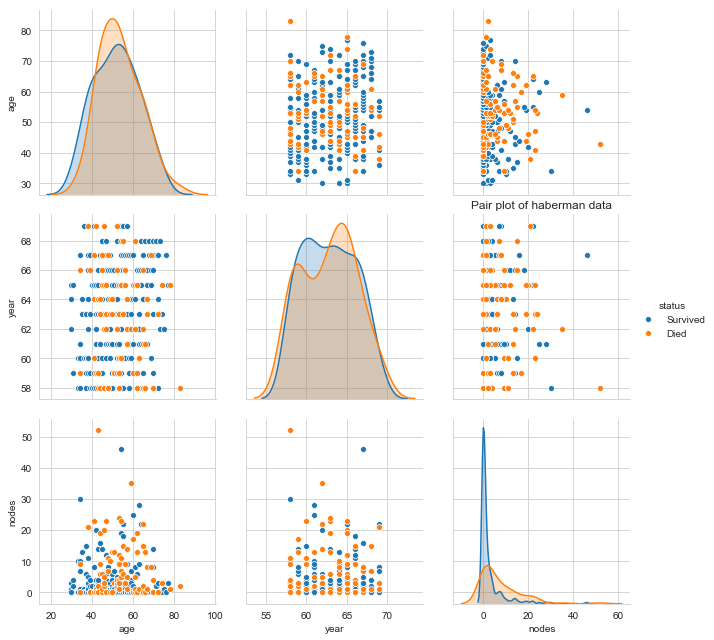

In [41]:
#Pair plot of haberman data

plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman_data,hue="status",height=3)
plt.title('Pair plot of haberman data')
plt.show()

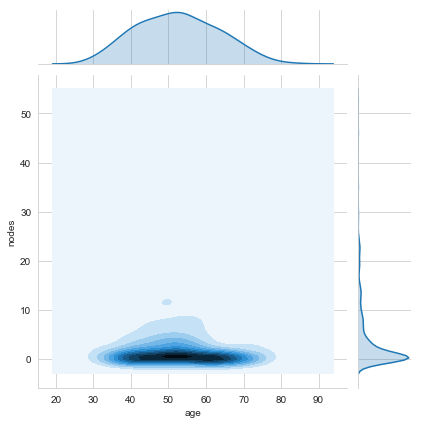

In [44]:
#Contour plot of Age and Node of patients

sns.jointplot(x="age", y="nodes", data=haberman_data, kind="kde");
plt.show();

# Conclusion:  

1. Haberman dataset contains an imbalanced dataset with 225 data points under positive class (patient survived) and 81 data points under negative class (patient died).

2. Patients with age 40 to 60 have died within 5 years of operation and people below age of 40 tend to survive.

3. Most unsuccessful operation were performed between 1963 and 1967.

4. Patients with 0 node have a higher survival rate (more than 83 percent of survived patients) than patients with more than 1 node.

5. Nodes is the most important feature of the dataset as patients with 1 or more nodes did not survive and patients who survived mostly had 0 nodes.

6. Age is another important feature as patients below age 40 are more likely to survive an operation.